In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
class DelayAnalysis:

    def __init__(self, folder, file, fid = None):
        self.raw_data = self.read_out_tr(folder, file)
        self.tcp_pkt = self.get_tcp_packets(self.raw_data)
        if fid:
            self.tcp_pkt = self.get_fid_packets(self.tcp_pkt, fid)
        history = self.tcp_pkt.groupby('pkt_id')
        self.duration = (history['time'].last() - history['time'].first()) * 1e6
        
    def read_out_tr(self, dir, file):
        col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
        df = pd.read_csv(dir+file, sep = ' ', header = None)
        df.columns = col
        return df
    
    def get_fid_packets(self, df, fid):
        df_out = df.loc[df["fid"].isin([fid])]
        return df_out
        
    def get_tcp_packets(self, df):
        df_out = df.loc[df["pkt_type"].isin(["tcp"])]
        return df_out
    
    def get_pkt_detail_by_pktid(self, id):
        return self.tcp_pkt[self.tcp_pkt['pkt_id'] == id]
    
    def dropped_pkt_and_id(self):
        history = self.tcp_pkt.groupby('pkt_id')
        dropped_pkt_id = (history['events'].last() == 'd')
        dropped_pkt_id = dropped_pkt_id[dropped_pkt_id]
        dropped = self.tcp_pkt[self.tcp_pkt.pkt_id.isin(dropped_pkt_id.index)]
        dropped.set_index(['pkt_id', dropped.index], inplace = True)
        return dropped, dropped_pkt_id.index.tolist()
    
    def print_pkt_delay(self, rtt, title=None):
        # us
        duration = self.duration
        drop_id = self.dropped_pkt_and_id()[1]
        #plt.figure(figsize=(20, 8))
        plt.scatter(duration.index, duration, label='received')
        plt.xlabel('pkt_id')
        plt.ylabel('delay(us)')
        plt.axhline(y=rtt/2, color='g', linestyle='-')
        plt.scatter(duration[drop_id].index, duration[drop_id], color='r', label='drop')
        plt.legend()
        plt.title(title)
        plt.show()
        
    def filter_by_delay(self, boolFunc):
        duration = self.duration
        filter_pkt = self.tcp_pkt[self.tcp_pkt.pkt_id.isin(duration[boolFunc].index)]
        filter_pkt.set_index(['pkt_id', filter_pkt.index], inplace = True)
        return filter_pkt

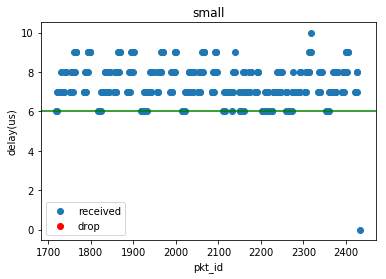

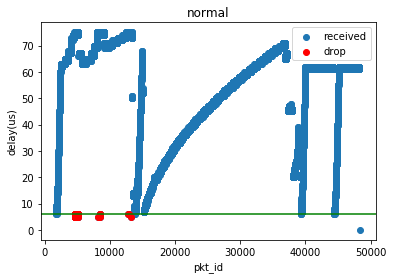

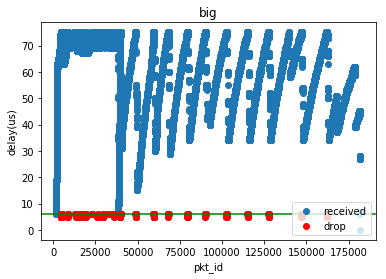

In [3]:
if __name__ == '__main__':
    #pd.set_option('display.width',1000)
    directory = "/home/ovs2/lining/Gearbox/manual/DropTail/"
    SmallDropTailDelay = DelayAnalysis(directory, 'small-out.tr')
    SmallDropTailDelay.print_pkt_delay(12, 'small')
    NormalDropTailDelay = DelayAnalysis(directory, 'normal-out.tr')
    NormalDropTailDelay.print_pkt_delay(12, 'normal')
    BigDropTailDelay = DelayAnalysis(directory, 'big-out.tr')
    BigDropTailDelay.print_pkt_delay(12, 'big')

In [4]:
if __name__=='__main__':
    res = NormalDropTailDelay.filter_by_delay(lambda delay: (40 < delay))
    display(res)

events      time  from_node  to_node pkt_type  pkt_size  \
pkt_id                                                                  
2194   13000       +  1.005723         23       13      tcp      1500   
       13001       -  1.005723         23       13      tcp      1500   
2195   13002       +  1.005723         23       13      tcp      1500   
       13020       -  1.005723         23       13      tcp      1500   
2204   13158       +  1.005724         23       13      tcp      1500   
       13176       -  1.005724         23       13      tcp      1500   
2194   13192       r  1.005724         23       13      tcp      1500   
       13193       +  1.005724         13        1      tcp      1500   
       13194       -  1.005724         13        1      tcp      1500   
2206   13208       +  1.005725         23       13      tcp      1500   
       13209       -  1.005725         23       13      tcp      1500   
2207   13210       +  1.005725         23       13      tcp      1500   
2195   13213       r  1.005725         23       13      tcp      1500   
       13214       +  1.005725         13        1      tcp      1500   
       13215       -  1.005725         13        1      tcp      1500   
2207   13228       -  1.005725         23       13      tcp      1500   
2209   13260       +  1.005725         23       13      tcp      1500   
       13261       -  1.005725         23       13      tcp      1500   
2210   13262       +  1.005725         23       13      tcp      1500   
       13280       -  1.005725         23       13      tcp      1500   
2212   13312       +  1.005725         23       13      tcp      1500   
       13313       -  1.005725         23       13      tcp      1500   
2213   13314       +  1.005725         23       13      tcp      1500   
       13332       -  1.005725         23       13      tcp      1500   
2215   13364       +  1.005725         23       13      tcp      1500   
       13365       -  1.005725         23       13      tcp      1500   
2216   13366       +  1.005725         23       13      tcp      1500   
2204   13369       r  1.005725         23       13      tcp      1500   
       13370       +  1.005725         13        1      tcp      1500   
       13371       -  1.005725         13        1      tcp      1500   
...              ...       ...        ...      ...      ...       ...   
48210  845611      -  1.014497         19       35      tcp      1500   
48202  845618      r  1.014497         19       35      tcp      1500   
48212  845631      -  1.014497         19       35      tcp      1500   
48204  845638      r  1.014497         19       35      tcp      1500   
48214  845651      -  1.014497         19       35      tcp      1500   
48206  845658      r  1.014497         19       35      tcp      1500   
48216  845671      -  1.014498         19       35      tcp      1500   
48208  845678      r  1.014498         19       35      tcp      1500   
48218  845691      -  1.014498         19       35      tcp      1500   
48210  845698      r  1.014498         19       35      tcp      1500   
48220  845711      -  1.014498         19       35      tcp      1500   
48212  845718      r  1.014498         19       35      tcp      1500   
48222  845731      -  1.014499         19       35      tcp      1500   
48214  845738      r  1.014499         19       35      tcp      1500   
48224  845751      -  1.014499         19       35      tcp      1500   
48216  845758      r  1.014499         19       35      tcp      1500   
48226  845771      -  1.014499         19       35      tcp      1500   
48218  845778      r  1.014499         19       35      tcp      1500   
48228  845791      -  1.014499         19       35      tcp      1500   
48220  845798      r  1.014500         19       35      tcp      1500   
48230  845811      -  1.014500         19       35      tcp      1500   
48222  845818      r  1.014500         19       35      tcp      1500   

In [5]:
if __name__ == '__main__':
    res = NormalDropTailDelay.get_pkt_detail_by_pktid(2194)
    display(res)

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
13000,+,1.005723,23,13,tcp,1500,------N,7,23.0,35.3,436541,2194
13001,-,1.005723,23,13,tcp,1500,------N,7,23.0,35.3,436541,2194
13192,r,1.005724,23,13,tcp,1500,------N,7,23.0,35.3,436541,2194
13193,+,1.005724,13,1,tcp,1500,------N,7,23.0,35.3,436541,2194
13194,-,1.005724,13,1,tcp,1500,------N,7,23.0,35.3,436541,2194
13385,r,1.005726,13,1,tcp,1500,------N,7,23.0,35.3,436541,2194
13386,+,1.005726,1,10,tcp,1500,------N,7,23.0,35.3,436541,2194
13387,-,1.005726,1,10,tcp,1500,------N,7,23.0,35.3,436541,2194
13580,r,1.005727,1,10,tcp,1500,------N,7,23.0,35.3,436541,2194
13581,+,1.005727,10,7,tcp,1500,------N,7,23.0,35.3,436541,2194


### coding example

In [6]:
if __name__ == '__main__':
    AFQ10folder = "/home/ovs2/lining/Gearbox/manual/AFQ10/"
    AFQ10delay = DelayAnalysis(AFQ10folder, 'out.tr')
    HRCCfolder = "/home/ovs2/lining/Gearbox/manual/HRCC/"
    HRCCdelay = DelayAnalysis(HRCCfolder, 'out.tr')

    drop_pkt, drop_pkt_id = AFQ10delay.dropped_pkt_and_id()
    print(drop_pkt_id[:10], '...')
    display(drop_pkt.head())

    AFQ10delay.print_pkt_delay(12)

FileNotFoundError: [Errno 2] File b'/home/ovs2/lining/Gearbox/manual/AFQ10/out.tr' does not exist: b'/home/ovs2/lining/Gearbox/manual/AFQ10/out.tr'

### <span style="color:red"> here is a problem, boundary is also included</span>.

In [ ]:
if __name__ == '__main__':
    # below 6 ms
    res = AFQ10delay.filter_by_delay(lambda delay: (10 < delay) & (delay < 12))
    display(res.head())
    display(AFQ10delay.get_pkt_detail_by_pktid(1800))